# Лабораторная работа №3. Применение однослойной нейронной сети с линейной функцией активации для прогнозирования временных рядов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def simulated_function(t):
    return 0.4 * np.sin(0.3 * t) + 0.5

In [3]:
start = -4
stop = 4
points_number = 20
p = 6

### Готовим обучающую выборку

In [4]:
t = np.linspace(start, stop, points_number, endpoint=True) # равномерно распределенные на отрезке [start, stop] значения t
x = simulated_function(t) # points_number значений нашего временного ряда

In [5]:
x

array([0.12718437, 0.14841463, 0.17524722, 0.20725458, 0.24392668,
       0.28467918, 0.3288627 , 0.3757732 , 0.42466319, 0.47475363,
       0.52524637, 0.57533681, 0.6242268 , 0.6711373 , 0.71532082,
       0.75607332, 0.79274542, 0.82475278, 0.85158537, 0.87281563])

### График обучающей выборки

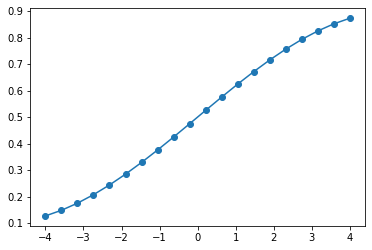

In [6]:
plt.plot(t, x)
plt.plot(t, x, 'o', color='tab:blue')

### Все возможные "скользящие окна"

In [7]:
X_sliding_windows = np.array([[x[j] for j in range(i, i + p)] for i in range(points_number - p)])

In [8]:
X_sliding_windows[0], X_sliding_windows[-1]

(array([0.12718437, 0.14841463, 0.17524722, 0.20725458, 0.24392668,
        0.28467918]),
 array([0.6711373 , 0.71532082, 0.75607332, 0.79274542, 0.82475278,
        0.85158537]))

### Правильные ответы для каждого набора иксов

In [9]:
X_true = np.array([x[i] for i in range(p, points_number)])

In [10]:
X_true

array([0.3288627 , 0.3757732 , 0.42466319, 0.47475363, 0.52524637,
       0.57533681, 0.6242268 , 0.6711373 , 0.71532082, 0.75607332,
       0.79274542, 0.82475278, 0.85158537, 0.87281563])

In [12]:
len(X_sliding_windows), len(X_true)

(14, 14)

### Готовим тестовую выборку

In [13]:
t_test = np.linspace(stop, 12, points_number, endpoint=True)[1:]
x_test = simulated_function(t_test)

### График тестовой выборки

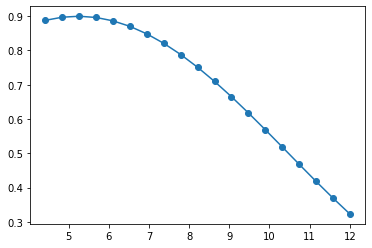

In [14]:
plt.plot(t_test, x_test)
plt.plot(t_test, x_test, 'o', color='tab:blue')

### Обучающая и тестовая выборки на одном графике

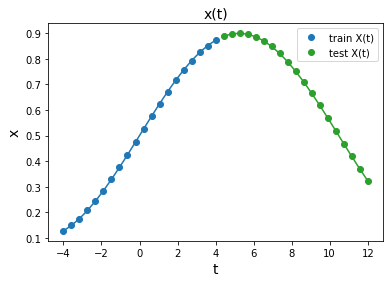

In [15]:
fig, ax = plt.subplots()
plt.plot(t, x, 'o', color='tab:blue')
plt.plot(t_test, x_test, 'o', color='tab:green')
plt.plot(t, x, color='tab:blue')
plt.plot(t_test, x_test, color='tab:green')
ax.legend(['train X(t)', 'test X(t)'])
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('x', fontsize=14)
ax.set_title('x(t)', fontsize=14)
plt.show()

### Функции, нужные для обучения и получения предсказания

In [16]:
def get_delta(x_true, x_predicted):
    return x_true - x_predicted

In [17]:
def predict(net, x, number_of_predictions):
    x_test = x[points_number - p:points_number]
    predict = []
    for i in range(number_of_predictions):
        x_next = net.forward(x_test)
        predict.append(x_next)
        x_test = np.append(x_test[1:], x_next)
    return np.array(predict)

In [26]:
def show_predict(net, t_test, x_test, x):
    x_predicted = predict(net, x, len(t_test))
    fig, ax = plt.subplots()
    ax.plot(t_test, x_test, color = 'tab:pink')
    ax.plot(t_test, x_predicted, 'o', color = 'xkcd:sky blue')
    ax.set_xlabel('t', fontsize=14)
    ax.set_ylabel('x', fontsize=14)
    ax.set_title('x(t)', fontsize=14)
    ax.legend(['true X(t)', 'predicted X(t)'])

### Нейросеть

In [19]:
class Net:
    
    def __init__(self, seed=1):
        np.random.seed(seed)
        self.W = np.zeros(shape=6)
        self.b = 0
#         self.W = np.random.normal(scale=0.1, size=4)
#         self.b = np.random.randint(1)
    
    def forward(self, x):
        self.x = x
        self.net = np.dot(self.W, x) + self.b
        return self.net
    
    def backward(self, delta, lr=0.01):
        self.dW = np.dot(lr * delta, self.x)
        self.db = lr * delta
        self.W = self.W + self.dW
        self.b = self.b + self.db

### Функция обучения нейросети

In [20]:
def train_neural_network(X_sliding_windows, X_true, epoch_number, lr, size_of_train=len(X_sliding_windows)):
    net = Net()
    L_iter = []
    for epoch in range(epoch_number):
        error = 0
        Y_predicted = []
        for i in range(size_of_train):
            x_train = X_sliding_windows[i]
            y_true = X_true[i]
            y_predicted = net.forward(x_train)
            delta = get_delta(y_true, y_predicted)
            error += delta ** 2
            net.backward(delta, lr)
            Y_predicted.append(y_predicted)
        L_iter.append(sqrt(error))

        if (error == 0):
            break
    
    fig, ax = plt.subplots()
    ax.plot(list(range(epoch_number)), L_iter)
    ax.set_xlabel('epoch number')
    ax.set_ylabel('error')
    ax.set_title('Error(epoch)')
    return net

### Обучаем нейросеть. 2000 эпох

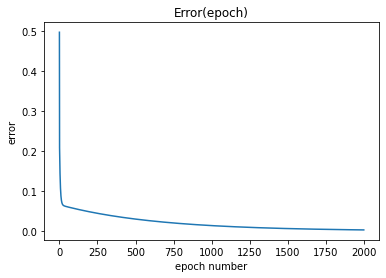

In [27]:
net1 = train_neural_network(X_sliding_windows, X_true, epoch_number=2000, lr=0.3)

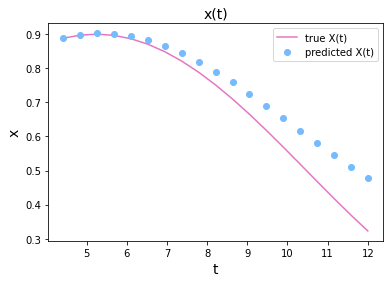

In [28]:
show_predict(net1, t_test, x_test, x)

In [29]:
print('b = ', net1.b, 'W = ', net1.W)

b =  0.04454020483905796 W =  [-0.31906482 -0.13016097  0.0611718   0.25188468  0.43893878  0.61935349]


### Обучаем нейросеть. 4000 эпох

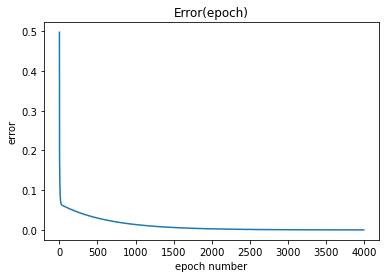

In [44]:
net2 = train_neural_network(X_sliding_windows, X_true, epoch_number=4000, lr=0.3)

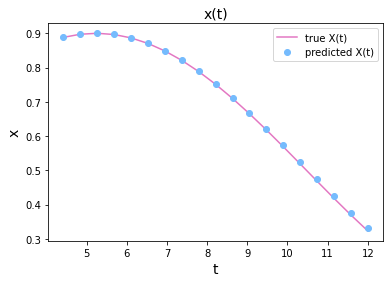

In [45]:
show_predict(net2, t_test, x_test, x)

In [46]:
print('b = ', net2.b, 'W = ', net2.W)

b =  0.0378450312737479 W =  [-0.33751336 -0.14109195  0.0578792   0.2562296   0.45079863  0.63848594]
